## Load the Data

In [3]:
import pandas as pd
pd.set_option("max_columns", None)

In [4]:
collisions = pd.read_csv("../data/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

In [5]:
collisions.head()

DATE   TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  11/10/2016  15:11       NaN       NaN        NaN        NaN   
1  04/16/2016   4:13       NaN       NaN  40.767373 -73.950057   
2  04/16/2016   4:22       NaN       NaN        NaN        NaN   
3  04/16/2016   4:30     BRONX   10468.0  40.862679 -73.909040   
4  04/16/2016   4:30  BROOKLYN   11249.0  40.716508 -73.961275   

                    LOCATION   ON STREET NAME  CROSS STREET NAME  \
0                        NaN    MONROE STREET                NaN   
1   (40.767373, -73.9500574)   EAST 68 STREET                NaN   
2                        NaN    BORDEN AVENUE        58TH STREET   
3  (40.8626793, -73.9090397)  SEDGWICK AVENUE  WEST FORDHAM ROAD   
4  (40.7165078, -73.9612751)              NaN                NaN   

    OFF STREET NAME  NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0               NaN                          0                         0   
1               NaN                          1                         0   
2               NaN                          1                         0   
3               NaN                          0                         0   
4  203 BERRY STREET                          0                         0   

   NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
0                              0                             0   
1                              0                             0   
2                              1                             0   
3                              0                             0   
4                              0                             0   

   NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
0                           0                          0   
1                           1                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

    CONTRIBUTING FACTOR VEHICLE 1 CONTRIBUTING FACTOR VEHICLE 2  \
0  Driver Inattention/Distraction                   Unspecified   
1                 Fatigued/Drowsy               Fatigued/Drowsy   
2           Passenger Distraction                           NaN   
3             Alcohol Involvement                           NaN   
4                     Unspecified                   Unspecified   

  CONTRIBUTING FACTOR VEHICLE 3 CONTRIBUTING FACTOR VEHICLE 4  \
0                           NaN                           NaN   
1               Fatigued/Drowsy                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

  CONTRIBUTING FACTOR VEHICLE 5  UNIQUE KEY VEHICLE TYPE CODE 1  \
0                           NaN     3559084   PASSENGER VEHICLE   
1                           NaN     3408932   PASSENGER VEHICLE   
2                           NaN     3425902                 NaN   
3                           NaN     3414396   PASSENGER VEHICLE   
4                           NaN     3421852   PASSENGER VEHICLE   

  VEHICLE TYPE CODE 2 VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4  \
0                 NaN                 NaN                 NaN   
1   PASSENGER VEHICLE   PASSENGER VEHICLE                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4   PASSENGER VEHICLE                 NaN                 NaN   

  VEHICLE TYPE CODE 5  
0                 NaN  
1  

In [6]:
collisions_by_zipcode = collisions[['LOCATION', 'ZIP CODE']].groupby("ZIP CODE").count()

In [7]:
collisions_by_zipcode = collisions_by_zipcode.sort_values(by='LOCATION', ascending=False)

In [8]:
collisions_by_zipcode.columns = ['COLLISIONS']

In [9]:
collisions_by_zipcode.head()

COLLISIONS
ZIP CODE            
11207.0         2083
11101.0         1623
10019.0         1570
11201.0         1528
10016.0         1526

In [10]:
%matplotlib inline

In [11]:
top_zips = collisions_by_zipcode.head(20)

## pandas

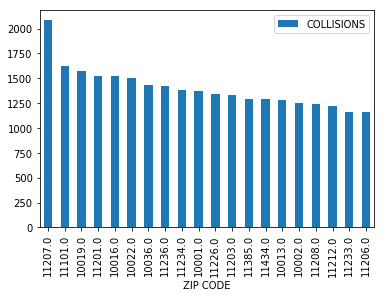

In [10]:
top_zips.plot.bar()

**Pandas Plotting** (High Level)

Advantages:
* Immediately available&mdash;doesn't require additional imports to work.

Disadvantages:
* You must get the data into the right shape yourself.

Backend: `matplotlib`

## matplotlib

In [11]:
import matplotlib.pyplot as plt

<Container object of 20 artists>

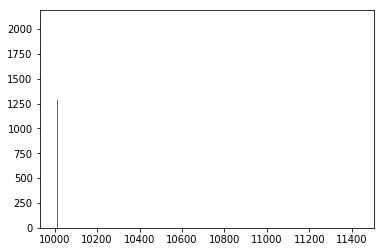

In [12]:
plt.bar(top_zips.index, top_zips.values)

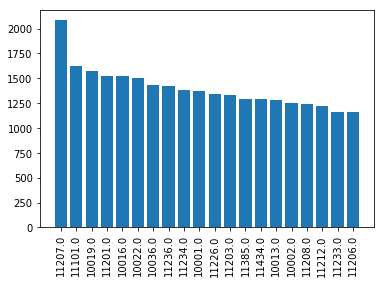

In [14]:
plt.bar(range(len(top_zips.index)), 
        top_zips.values,
        tick_label=top_zips.index)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
pass

`matplotlib`

Advantages:
* Stable do-everything API.
* Enourmous amount of examples to learn from.

## seaborn

In [15]:
import seaborn as sns

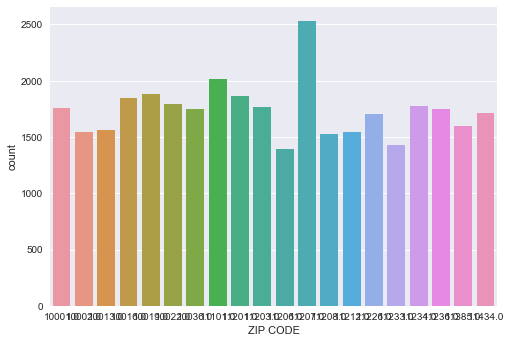

In [24]:
sns.countplot(x='ZIP CODE', data=collisions[collisions['ZIP CODE'].isin(top_zips.index)])

`seaborn`

Advantages:
* Aggregates your data for you.
* Creates nice default visuals.

Backend: `matplotlib`

## mpld3

In [31]:
import matplotlib.pyplot as plt
import mpld3

plt.bar(range(len(top_zips.index)), 
        top_zips.values,
        tick_label=top_zips.index)
ax = plt.gca()

mpld3.display()

`mpld3`

Advantages:
* Drop-in interactivity.

Disadvantages:
* Doesn't respect all `mpl` settings; breaks on more complex plots.

Backend:
`d3`

In [32]:
top_zips.plot.bar()
mpld3.display()

## bokeh

In [39]:
from bokeh.charts import Bar
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [58]:
plot = Bar(top_zips, values='COLLISIONS', legend=False)
show(plot)

Note: no easy way to sort the columns yourself...?

In [97]:
from bokeh.plotting import show, figure
from bokeh.io import output_notebook
from bokeh.models import Range1d

r = list(range(0, len(top_zips)))

plot = figure(x_range=Range1d(-1, len(top_zips)), y_range=(0, 2200))
plot.rect(r, 
          top_zips['COLLISIONS'].values / 2,  # y coordinate of the center of the rectangle
          width=0.5,
          height=top_zips['COLLISIONS'].values, 
          color ="steelblue")

show(plot)

In [89]:
# https://github.com/bokeh/bokeh/issues/1671

In [93]:
from bokeh.plotting import show, figure
from bokeh.io import output_notebook
from bokeh.models import Range1d
from bokeh.models import FixedTicker, TickFormatter
from bokeh.properties import Dict, Int, String

r = list(range(0, len(top_zips)))

from bokeh.util.compiler import CoffeeScript

class FixedTickFormatter(TickFormatter):
    """
    Class used to allow custom axis tick labels on a bokeh chart
    Extends bokeh.model.formatters.TickFormatter
    """

    COFFEESCRIPT =  """
        import {Model} from "model"
        import * as p from "core/properties"
        export class FixedTickFormatter extends Model
          type: 'FixedTickFormatter'
          doFormat: (ticks) ->
            labels = @get("labels")
            return (labels[tick] ? "" for tick in ticks)
          @define {
            labels: [ p.Any ]
          }
    """

    labels = Dict(Int, String, help="""
    A mapping of integer ticks values to their labels.
    """)

    __implementation__ = CoffeeScript(COFFEESCRIPT)
    
    
ticker = FixedTicker(ticks=[5,15,25,35,45,55])
formatter = FixedTickFormatter(labels={5: '0-10', 15: '10-20', 25: '20-30', 35: '30-40', 45: '40-50', 55: '50+'})

cbar = ColorBar(color_mapper=color_mapper, ticker=ticker, formatter=formatter,
                major_tick_out=0, major_tick_in=0, major_label_text_align='left',
                major_label_text_font_size='10pt', label_standoff=2)

plot = figure(x_range=Range1d(-1, len(top_zips)), 
              y_range=(0, 2200))
plot.rect(r, 
          top_zips['COLLISIONS'].values / 2,  # y coordinate of the center of the rectangle
          width=0.5,
          height=top_zips['COLLISIONS'].values, 
          color ="steelblue")

show(plot)

/Users/Honors/anaconda/envs/plotting-tools/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: bokeh.properties was deprecated in Bokeh 0.11.0 and will be removed, use bokeh.core.properties instead.
  warn(message)


AttributeError: unexpected attribute 'ticker' to Figure, possible attributes are above, background_fill_alpha, background_fill_color, below, border_fill_alpha, border_fill_color, css_classes, disabled, extra_x_ranges, extra_y_ranges, h_symmetry, height, hidpi, inner_height, inner_width, js_callbacks, left, lod_factor, lod_interval, lod_threshold, lod_timeout, min_border, min_border_bottom, min_border_left, min_border_right, min_border_top, name, outline_line_alpha, outline_line_cap, outline_line_color, outline_line_dash, outline_line_dash_offset, outline_line_join, outline_line_width, plot_height, plot_width, renderers, right, sizing_mode, tags, title, title_location, tool_events, toolbar, toolbar_location, toolbar_sticky, v_symmetry, webgl, width, x_mapper_type, x_range, y_mapper_type or y_range

`bokeh`

Advantages:
* Animation and interactivity are first-class.

Disadvantages:
* Unstable; API has many corner cases and sharp edges.
* Documenation is improving, but nowhere near `mpl` good.

## pygal

In [100]:
import pygal

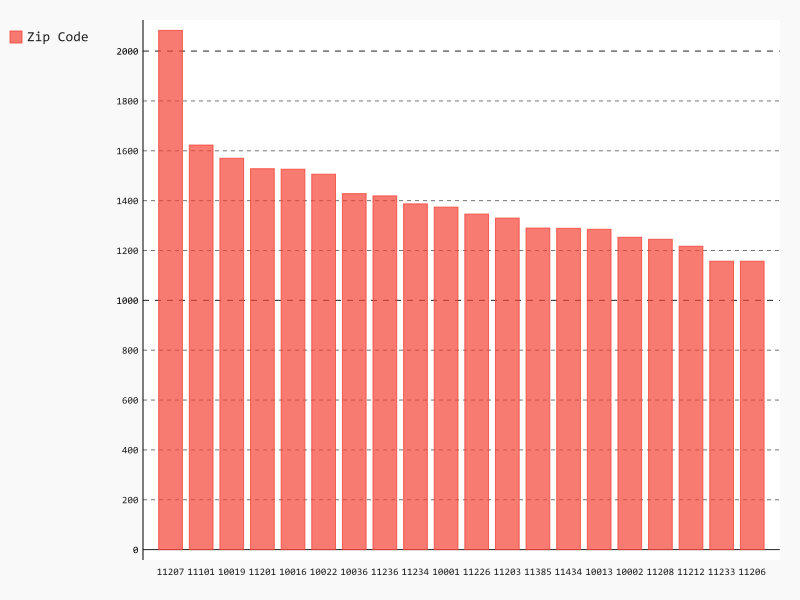

In [110]:
line_chart = pygal.Bar()
# line_chart.title = 'Browser usage evolution (in %)'
line_chart.x_labels = top_zips.index.values
line_chart.add('Zip Code', top_zips['COLLISIONS'].values)

line_chart

`pygal`

Advantages
* Simple API.

## ggplot

In [13]:
from ggplot import *

In [22]:
top_zips.head(3)

COLLISIONS
ZIP CODE            
11207.0         2083
11101.0         1623
10019.0         1570

In [21]:
mtcars.head(3)

name   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0      Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1  Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2     Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   

   carb  
0     4  
1     4  
2     1

In [36]:
collisions.head(3)

DATE   TIME BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  11/10/2016  15:11     NaN       NaN        NaN        NaN   
1  04/16/2016   4:13     NaN       NaN  40.767373 -73.950057   
2  04/16/2016   4:22     NaN       NaN        NaN        NaN   

                   LOCATION  ON STREET NAME CROSS STREET NAME OFF STREET NAME  \
0                       NaN   MONROE STREET               NaN             NaN   
1  (40.767373, -73.9500574)  EAST 68 STREET               NaN             NaN   
2                       NaN   BORDEN AVENUE       58TH STREET             NaN   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                          0                         0   
1                          1                         0   
2                          1                         0   

   NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
0                              0                             0   
1                              0                             0   
2                              1                             0   

   NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
0                          0                         0   
1                          0                         0   
2                          0                         0   

   NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
0                           0                          0   
1                           1                          0   
2                           0                          0   

    CONTRIBUTING FACTOR VEHICLE 1 CONTRIBUTING FACTOR VEHICLE 2  \
0  Driver Inattention/Distraction                   Unspecified   
1                 Fatigued/Drowsy               Fatigued/Drowsy   
2           Passenger Distraction                           NaN   

  CONTRIBUTING FACTOR VEHICLE 3 CONTRIBUTING FACTOR VEHICLE 4  \
0                           NaN                           NaN   
1               Fatigued/Drowsy                           NaN   
2                           NaN                           NaN   

  CONTRIBUTING FACTOR VEHICLE 5  UNIQUE KEY VEHICLE TYPE CODE 1  \
0                           NaN     3559084   PASSENGER VEHICLE   
1                           NaN     3408932   PASSENGER VEHICLE   
2                           NaN     3425902                 NaN   

  VEHICLE TYPE CODE 2 VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4  \
0                 NaN                 NaN                 NaN   
1   PASSENGER VEHICLE   PASSENGER VEHICLE                 NaN   
2                 NaN                 NaN                 NaN   

  VEHICLE TYPE CODE 5  
0                 NaN  
1                 NaN  
2                 NaN

In [42]:
(
    ggplot(aes(x='ZIP CODE', y='COLLISIONS'), 
           data=collisions[collisions['ZIP CODE'].isin(top_zips.index)].rename(columns={'BOROUGH': 'COLLISIONS'}))
    + geom_bar()
    + theme(axis_text_x=element_text(angle=90, hjust=1)) 
)

<ggplot: (295161422)>

`ggplot`

Advantages:
* Simple API.

Either:
* Grammer of Graphics design.

Disadvantages:
* Design encourages polluting the namespace with `ggplot` objects.
* Lacks docs for certain features (like text rotation).

Backend: `matplotlib`.

## holoviews

In [43]:
import holoviews as hv

hv.notebook_extension()

/Users/Honors/anaconda/envs/plotting-tools/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


b':Table   [ZIP CODE]   (COLLISIONS)'
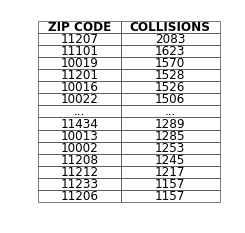

In [118]:
table = hv.Table((top_zips.index.values, top_zips['COLLISIONS'].values), kdims=['ZIP CODE'], vdims=['COLLISIONS'])
table

b':Bars   [ZIP CODE]   (COLLISIONS)'
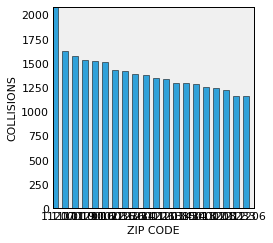

In [119]:
hv.Bars(table)

:Layout
   .Scatter.I :Scatter   [ZIP CODE]   (COLLISIONS)
   .Curve.I   :Curve   [ZIP CODE]   (COLLISIONS)
   .Bars.I    :Bars   [ZIP CODE]   (COLLISIONS)
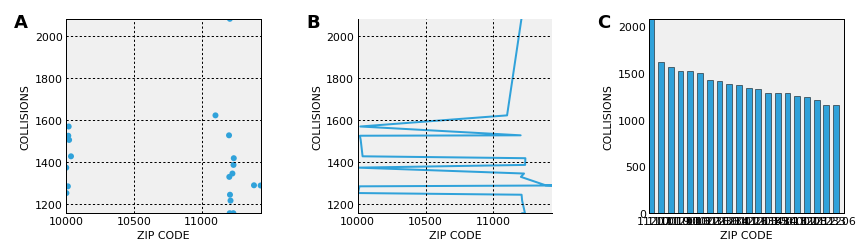

In [120]:
hv.Scatter(table) + hv.Curve(table) + hv.Bars(table)

`holoviews`

Advantages:
* Powerful, high-throughput API.

Either:
* Grammer of Graphics design.

Disadvantages:
* High learning curve.

## leather

Can't even get this working...?

Looks like a `pygal`-lite written by someone with no awareness of `pandas` or `numpy`. Only useful for toy examples. Don't use this.

In [54]:
# import leather

In [117]:
# datum = top_zips.reset_index().values.T.tolist()
# datum[0] = [str(d) for d in datum[0]]

# print(datum)

# chart = leather.Chart()
# chart.add_bars(datum, x=0, y=1)

# chart

## bqplot

In [17]:
from bqplot import pyplot as bqplt
import numpy as np

bqplt.figure(2, title='Line Chart')
bqplt.bar(range(len(top_zips.index)), 
        top_zips.values,
        tick_label=top_zips.index)

bqplt.show()